https://wits.worldbank.org/trade/comtrade/en/country/ALL/year/2023/tradeflow/Imports/partner/WLD/product/121410

https://wits.worldbank.org/trade/comtrade/en/country/ALL/year/2003/tradeflow/imports/partner/ESP/product/121490#

TARIC:
  - **12.14** (alfalfa y otros forrajes)
  - **12.14.90** (cubos, pacas u otros formatos - alfalfa y otros forrajes)


**USED**:
  - **12.14.90** (balas de forrajes deshidratados: alfalfa, festuca, reglas, avena forrajera)
  - **12.14.10** (harina y pellets - de alfalfa - fertilizante y alimentacion animal)

#**0. LIBRARIES & PACKAGES LOAD**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#GLOBAL EXPORTS
df_121410_exp=pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/global_exp_imp/db_121410_exports_world.xlsx')
df_121490_exp=pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/global_exp_imp/db_121490_exports_world.xlsx')

#GLOBAL IMPORTS
df_121410_imp=pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/global_exp_imp/db_121410_imports_world.xlsx')
df_121490_imp=pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/global_exp_imp/db_121490_imports_world.xlsx')

#5 MAIN EXPORTERS
df_121410_main_imp_aus = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121410_imports_australia.xlsx')
df_121490_main_imp_aus = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121490_imports_australia.xlsx')

df_121410_main_imp_can = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121410_imports_canada.xlsx')
df_121490_main_imp_can = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121490_imports_canada.xlsx')

df_121410_main_imp_ita = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121410_imports_italy.xlsx')
df_121490_main_imp_ita = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121490_imports_italy.xlsx')

df_121410_main_imp_spain = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121410_imports_spain.xlsx')
df_121490_main_imp_spain = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121490_imports_spain.xlsx')

df_121410_main_imp_usa = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121410_imports_usa.xlsx')
df_121490_main_imp_usa = pd.read_excel('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/main5/db_121490_imports_usa.xlsx')

#**1. DATASET: PREPARATION**

##**1.1 CONCAT & PREPARE: DF_IMP & DF_EXP**

###**1.1.1 COUNTRY NAME REPLACEMENT**

In [4]:
#REPLACEMENTS
country_name_map = {
    'Egypt, Arab Rep.': 'Egypt',
    'Serbia, FR(Serbia/Montenegro)': 'Serbia',
    'Slovak Republic': 'Slovakia',
    'Russian Federation': 'Russia',
    'Hong Kong, China': 'Hong Kong (China)',
    'Macao': 'Macao (China)',
    'Other Asia, nes': 'Other Asia',
    'Ethiopia(excludes Eritrea)': 'Ethiopia',
    'Iran, Islamic Rep.': 'Iran',
    'Occ.Pal.Terr': 'Palestine',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Korea, Rep.': 'South Korea',
    'Bahamas, The': 'Bahamas',
    'Lao PDR': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'Gambia, The': 'Gambia',
    'Fm Sudan': 'Sudan',
    'Faeroe Islands':'Faroe Islands',
}

###**1.1.2 CONCAT & PREPARE: df_exp & df_imp + df_main_exporters**

* **df_exp & df_imp**

In [5]:
#CONCAT
df_exp = pd.concat([df_121410_exp,df_121490_exp], ignore_index=True)
df_imp = pd.concat([df_121410_imp,df_121490_imp], ignore_index=True)

#COUNTRY NAME REPLACEMENTS
df_exp['Reporter'].replace(country_name_map, inplace=True)
df_imp['Reporter'].replace(country_name_map, inplace=True)

#AMENDED MAIN VARIABLES
df_exp['tons'] = df_exp['Quantity']/1000
df_imp['tons'] = df_imp['Quantity']/1000
df_exp['usd'] = df_exp['Trade Value 1000USD']
df_imp['usd'] = df_imp['Trade Value 1000USD']

#DROP FORMER VARIABLES
drop_columns = ['Trade Value 1000USD','Quantity','Quantity Unit','TradeFlow','Partner']
df_exp.drop(columns=drop_columns,inplace=True)
df_imp.drop(columns=drop_columns,inplace=True)



* **df_imp (main 5 exporters)**

In [6]:
#COUNTRY DATASET MERGE & PREPARATION
df_main_imp_esp = pd.concat([df_121410_main_imp_spain,df_121490_main_imp_spain])
df_main_imp_esp['tons_esp'] = df_main_imp_esp['Quantity']/1000
df_main_imp_esp['usd_esp'] = df_main_imp_esp['Trade Value 1000USD']
df_main_imp_esp.drop(columns=drop_columns,inplace = True)
df_main_imp_esp['Reporter'] = df_main_imp_esp['Reporter'].str.replace('\xa0', '', regex=False)
df_main_imp_esp['Reporter'].replace(country_name_map, inplace=True)

df_main_imp_can = pd.concat([df_121410_main_imp_can,df_121490_main_imp_can])
df_main_imp_can['tons_can'] = df_main_imp_can['Quantity']/1000
df_main_imp_can['usd_can'] = df_main_imp_can['Trade Value 1000USD']
df_main_imp_can.drop(columns=drop_columns,inplace = True)
df_main_imp_can['Reporter'] = df_main_imp_can['Reporter'].str.replace('\xa0', '', regex=False)
df_main_imp_can['Reporter'].replace(country_name_map, inplace=True)

df_main_imp_usa = pd.concat([df_121410_main_imp_usa,df_121490_main_imp_usa])
df_main_imp_usa['tons_usa'] = df_main_imp_usa['Quantity']/1000
df_main_imp_usa['usd_usa'] = df_main_imp_usa['Trade Value 1000USD']
df_main_imp_usa.drop(columns=drop_columns,inplace = True)
df_main_imp_usa['Reporter'] = df_main_imp_usa['Reporter'].str.replace('\xa0', '', regex=False)
df_main_imp_usa['Reporter'].replace(country_name_map, inplace=True)

df_main_imp_ita = pd.concat([df_121410_main_imp_ita,df_121490_main_imp_ita])
df_main_imp_ita['tons_ita'] = df_main_imp_ita['Quantity']/1000
df_main_imp_ita['usd_ita'] = df_main_imp_ita['Trade Value 1000USD']
df_main_imp_ita.drop(columns=drop_columns,inplace = True)
df_main_imp_ita['Reporter'] = df_main_imp_ita['Reporter'].str.replace('\xa0', '', regex=False)
df_main_imp_ita['Reporter'].replace(country_name_map, inplace=True)

df_main_imp_aus = pd.concat([df_121410_main_imp_aus,df_121490_main_imp_aus])
df_main_imp_aus['tons_aus'] = df_main_imp_aus['Quantity']/1000
df_main_imp_aus['usd_aus'] = df_main_imp_aus['Trade Value 1000USD']
df_main_imp_aus.drop(columns=drop_columns,inplace = True)
df_main_imp_aus['Reporter'] = df_main_imp_aus['Reporter'].str.replace('\xa0', '', regex=False)
df_main_imp_aus['Reporter'].replace(country_name_map, inplace=True)

In [7]:
df_main_imp_aus

,Reporter,ProductCode,Product Description,Year,tons_aus,usd_aus
0,New Zealand,121410,Lucerne (alfalfa) meal and pellets,2023,753.825,443.24
1,Hong Kong (China),121410,Lucerne (alfalfa) meal and pellets,2023,226.000,165.52
2,United States,121410,Lucerne (alfalfa) meal and pellets,2023,819.000,162.70
3,Malaysia,121410,Lucerne (alfalfa) meal and pellets,2023,310.860,145.17
4,Philippines,121410,Lucerne (alfalfa) meal and pellets,2023,303.105,123.66
...,...,...,...,...,...,...
680,Thailand,121490,"Other forage products, nes",2003,8.100,2.78
681,Canada,121490,"Other forage products, nes",2003,15.000,1.44
682,Germany,121490,"Other forage products, nes",2003,1.100,1.00
683,Fiji,121490,"Other forage products, nes",2003,0.618,0.41


#**2. DATASET: MERGES** - df_imp

The final **df_imp_da** dataset will have not only the total imports, but also from where these imports come from (main 5 exporters).

In [8]:
merge_imp_var = ['Reporter', 'ProductCode', 'Year','Product Description']

df_imp = pd.merge(df_imp, df_main_imp_esp, how="left", on=merge_imp_var)
df_imp = pd.merge(df_imp, df_main_imp_usa, how="left", on=merge_imp_var)
df_imp = pd.merge(df_imp, df_main_imp_can, how="left", on=merge_imp_var)
df_imp = pd.merge(df_imp, df_main_imp_ita, how="left", on=merge_imp_var)
df_imp = pd.merge(df_imp, df_main_imp_aus, how="left", on=merge_imp_var)

In [9]:
df_imp.head(3)

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus
0,United States,121410,Lucerne (alfalfa) meal and pellets,2023,86706.0,37171.18,NaN,NaN,NaN,NaN,62422.0,26919.38,NaN,NaN,819.0,162.7
1,Japan,121410,Lucerne (alfalfa) meal and pellets,2023,57181.0,25614.25,2109.000,911.60,1058.0,589.85,16249.0,7421.20,32099.00,13785.95,NaN,NaN
2,Germany,121410,Lucerne (alfalfa) meal and pellets,2023,53935.2,18126.75,1.647,0.47,NaN,NaN,NaN,NaN,4184.79,1515.05,NaN,NaN


#**3. DATA CLEANING**

##**3.1 NAN VALUES** - **df_imp**

In [10]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporter             4998 non-null   object 
 1   ProductCode          4998 non-null   int64  
 2   Product Description  4998 non-null   object 
 3   Year                 4998 non-null   int64  
 4   tons                 4997 non-null   float64
 5   usd                  4998 non-null   float64
 6   tons_esp             1109 non-null   float64
 7   usd_esp              1109 non-null   float64
 8   tons_usa             1939 non-null   float64
 9   usd_usa              1939 non-null   float64
 10  tons_can             736 non-null    float64
 11  usd_can              736 non-null    float64
 12  tons_ita             1421 non-null   float64
 13  usd_ita              1421 non-null   float64
 14  tons_aus             933 non-null    float64
 15  usd_aus              933 non-null    f

###**3.1.1 TON NAN VALUES**

There were some NaN values in the original dataset. Those null values has been amened manually in the Excel Dataset, using the other data available in the website and trying to figure out aproximate values according to each country import.

In this particular case, as the ton null value is from value is from 2003 and the amount in usd is very small (30 USD), this register will be deleted as it does not show any representative value for the study.

In [11]:
df_imp[df_imp['tons'].isna()]

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus
2248,Nepal,121410,Lucerne (alfalfa) meal and pellets,2003,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_imp = df_imp.dropna(subset=['tons'])

In [13]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporter             4997 non-null   object 
 1   ProductCode          4997 non-null   int64  
 2   Product Description  4997 non-null   object 
 3   Year                 4997 non-null   int64  
 4   tons                 4997 non-null   float64
 5   usd                  4997 non-null   float64
 6   tons_esp             1109 non-null   float64
 7   usd_esp              1109 non-null   float64
 8   tons_usa             1939 non-null   float64
 9   usd_usa              1939 non-null   float64
 10  tons_can             736 non-null    float64
 11  usd_can              736 non-null    float64
 12  tons_ita             1421 non-null   float64
 13  usd_ita              1421 non-null   float64
 14  tons_aus             933 non-null    float64
 15  usd_aus              933 non-null    float6

###**3.1.2 COUNTRY IMPORTS (TONS & USD) NAN VALUES**

The country import columns appear in NaN values when there is no imports to an specific country and year. This values can be turned to zero, as there were no transactions.

In [14]:
subset_tons_usd = ['tons_esp','tons_usa','tons_can','tons_ita','tons_aus',
                 'usd_esp','usd_usa','usd_can','usd_ita','usd_aus']
df_imp[subset_tons_usd] = df_imp[subset_tons_usd].fillna(0)

In [15]:
df_imp.head()

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus
0,United States,121410,Lucerne (alfalfa) meal and pellets,2023,86706.0,37171.18,0.000,0.00,0.00,0.00,62422.0,26919.38,0.00,0.00,819.0,162.7
1,Japan,121410,Lucerne (alfalfa) meal and pellets,2023,57181.0,25614.25,2109.000,911.60,1058.00,589.85,16249.0,7421.20,32099.00,13785.95,0.0,0.0
2,Germany,121410,Lucerne (alfalfa) meal and pellets,2023,53935.2,18126.75,1.647,0.47,0.00,0.00,0.0,0.00,4184.79,1515.05,0.0,0.0
3,Belgium,121410,Lucerne (alfalfa) meal and pellets,2023,44722.4,14372.93,0.000,0.00,1.09,1.24,0.0,0.00,0.00,0.00,0.0,0.0
4,Jordan,121410,Lucerne (alfalfa) meal and pellets,2023,32203.6,13138.67,17424.300,7108.92,4164.04,1698.88,0.0,0.00,1570.96,640.93,0.0,0.0


##**3.2 NAN VALUES** - **df_exp**

In [16]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporter             2970 non-null   object 
 1   ProductCode          2970 non-null   int64  
 2   Product Description  2970 non-null   object 
 3   Year                 2970 non-null   int64  
 4   tons                 2970 non-null   float64
 5   usd                  2970 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 139.3+ KB


###**3.2.1 TON NAN VALUES**

As mentioned before, there were some NaN values in the original dataset. Those null values has been amened manually in the Excel Dataset, using the other data available in the website and trying to figure out aproximate values according to each country exports.

In [17]:
df_exp[df_exp['tons'].isna()]

,Reporter,ProductCode,Product Description,Year,tons,usd


#**4. FEATURE ENGINEERING**

##**4.1 COLUMN ['region']**

In [18]:
regions = {
    'North America': ['United States', 'Canada', 'Mexico', 'Bermuda', 'Greenland', 'Cayman Islands'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Peru', 'Ecuador', 'Bolivia', 'Guyana', 'Suriname', 'Venezuela'],
    'Central America and Caribbean': ['Netherlands Antilles','Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 'St. Vincent and the Grenadines', 'St. Lucia', 'St. Kitts and Nevis', 'Trinidad and Tobago', 'Turks and Caicos Isl.', 'Montserrat', 'Anguila'],
    'Western Europe': ['Switzerland', 'Netherlands', 'European Union', 'Germany', 'France', 'Spain', 'Belgium', 'Italy', 'Denmark', 'United Kingdom', 'Norway', 'Malta', 'Portugal', 'Ireland', 'Greece', 'Cyprus','Luxembourg', 'Sweden', 'Finland', 'Iceland', 'Austria', 'Andorra','Faroe Islands'],
    'Eastern Europe': ['Poland', 'Romania', 'Croatia', 'Czech Republic', 'Lithuania', 'Slovakia', 'Hungary', 'Bulgaria', 'Slovenia', 'Estonia', 'Latvia', 'Serbia', 'Kazakhstan', 'Montenegro', 'Kyrgyzstan', 'Georgia', 'Turkey', 'Ukraine', 'Armenia', 'Bosnia and Herzegovina', 'Moldova', 'Azerbaijan', 'Albania', 'Russia', 'Belarus', 'North Macedonia'],
    'Middle East': ['Jordan', 'Israel', 'Bahrain', 'United Arab Emirates', 'Qatar', 'Oman', 'Kuwait', 'Lebanon', 'Palestine', 'Iran', 'Saudi Arabia', 'Syria', 'Yemen'],
    'North Africa': ['Egypt', 'Morocco', 'Tunisia', 'Libya', 'Algeria'],
    'Sub-Saharan Africa': ['Mayotte','Sao Tome and Principe','Eswatini','Mauritius', 'Botswana', 'South Africa', 'Namibia', 'Mozambique', 'Ghana', 'Malawi', 'Benin', 'Kenya', 'Zambia', 'Nigeria', 'Senegal', 'Cape Verde', 'Seychelles', 'Angola', 'Tanzania', 'Niger', 'Congo, Dem. Rep.', 'Mauritania', "Cote d'Ivoire", 'Burundi', 'Ethiopia', 'Lesotho', 'Gabon', 'Cameroon', 'Rwanda', 'Uganda', 'Madagascar', 'Libya', 'Mali', 'Comoros', 'Burkina Faso', 'Zimbabwe', 'Guinea', 'Sudan', 'Gambia', 'Djibouti', 'Eritrea', 'Sierra Leone', 'Guinea-Bissau', 'Togo', 'Congo, Rep.'],
    'East Asia': ['Japan', 'China', 'Hong Kong (China)', 'South Korea', 'Macao (China)', 'Mongolia'],
    'Central Asia': ['India', 'Sri Lanka', 'Nepal', 'Bhutan', 'Bangladesh', 'Pakistan', 'Afghanistan', 'Maldives', 'Uzbekistan','Tajikistan',],
    'Southeast Asia': ['Malaysia', 'Philippines', 'Singapore', 'Brunei', 'Vietnam', 'Indonesia', 'Thailand', 'Myanmar', 'Cambodia', 'Laos', 'East Timor'],
    'Other Asia':'Other Asia',
    'Oceania': ['Wallis and Futura Isl.','New Caledonia','Australia', 'New Zealand', 'Fiji', 'French Polynesia', 'East Timor', 'Papua New Guinea', 'Palau', 'Solomon Islands', 'Vanuatu', 'Tonga', 'Samoa']
}

In [19]:
def region(pais):
    for region, paises in regions.items():
        if pais in paises:
            return region
    return 'No especificada'

df_exp['region'] = df_exp['Reporter'].apply(region)
df_imp['region'] = df_imp['Reporter'].apply(region)

In [20]:
df_exp.head(3)

,Reporter,ProductCode,Product Description,Year,tons,usd,region
0,European Union,121410,Lucerne (alfalfa) meal and pellets,2023,356408.316,114014.73,Western Europe
1,Spain,121410,Lucerne (alfalfa) meal and pellets,2023,245767.000,79205.66,Western Europe
2,France,121410,Lucerne (alfalfa) meal and pellets,2023,153843.000,49419.64,Western Europe


In [21]:
df_imp.head(3)

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus,region
0,United States,121410,Lucerne (alfalfa) meal and pellets,2023,86706.0,37171.18,0.000,0.00,0.0,0.00,62422.0,26919.38,0.00,0.00,819.0,162.7,North America
1,Japan,121410,Lucerne (alfalfa) meal and pellets,2023,57181.0,25614.25,2109.000,911.60,1058.0,589.85,16249.0,7421.20,32099.00,13785.95,0.0,0.0,East Asia
2,Germany,121410,Lucerne (alfalfa) meal and pellets,2023,53935.2,18126.75,1.647,0.47,0.0,0.00,0.0,0.00,4184.79,1515.05,0.0,0.0,Western Europe


##**4.2 COLUMN ['tons_other'] & ['usd_other']** - only for df_imp

In [22]:
df_imp[(df_imp['Reporter']=='Singapore') & (df_imp['ProductCode']==121410)& (df_imp['Year']==2019)]

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus,region
485,Singapore,121410,Lucerne (alfalfa) meal and pellets,2019,61.19,45.84,0.0,0.0,0.01,0.11,0.0,0.0,0.0,0.0,60.86,45.49,Southeast Asia


In [23]:
df_imp[(df_imp['Reporter']=='Finland') & (df_imp['ProductCode']==121410)& (df_imp['Year']==2019)]

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus,region
459,Finland,121410,Lucerne (alfalfa) meal and pellets,2019,910.794,310.19,0.0,0.0,0.0,0.0,0.051,4.32,86.617812,36.2,0.0,0.0,Western Europe


In [24]:
df_imp['tons_oth'] = df_imp['tons'] - df_imp[['tons_esp', 'tons_usa', 'tons_ita', 'tons_can', 'tons_aus']].sum(axis=1)
df_imp['usd_oth'] = df_imp['usd'] - df_imp[['usd_esp', 'usd_usa', 'usd_ita', 'usd_can', 'usd_aus']].sum(axis=1)

##**4.3 COLUMN ['eur_kg']**

* **MISMATCHING ZEROS**

There are some registers where there is zero in 'tons' but small values in 'usd' and viceversa. To avoid infinite values, all these registers, due its low importance, will be change by zero.

In [25]:
def missing_values(df):
  #COLUMN SELECTION
  usd_cols = [col for col in df.columns if col.startswith('usd')]
  tons_cols = [col for col in df.columns if col.startswith('tons')]

  #COUNTRY SELECTION DICT
  suffix_map = {col[len('tons'):] for col in tons_cols if col.startswith('tons')}

  for suffix in suffix_map:
    usd_col = f'usd_{suffix}' if suffix else 'usd'
    tons_col = f'tons_{suffix}' if suffix else 'tons'

    if usd_col in df.columns and tons_col in df.columns:
      df.loc[(df[usd_col] == 0) & (df[tons_col] != 0), tons_col] = 0
      df.loc[(df[tons_col] == 0) & (df[usd_col] != 0), usd_col] = 0

missing_values(df_exp)
missing_values(df_imp)

* **NEW COLUMN ['usd_kg']**

In [26]:
df_exp['usd_kg'] = round(df_exp['usd']/df_exp['tons'],4)
df_imp['usd_kg'] = round(df_imp['usd']/df_imp['tons'],4)

df_imp['usd_kg_esp'] = round(df_imp['usd_esp']/df_imp['tons_esp'],4)
df_imp['usd_kg_usa'] = round(df_imp['usd_usa']/df_imp['tons_usa'],4)
df_imp['usd_kg_ita'] = round(df_imp['usd_ita']/df_imp['tons_ita'],4)
df_imp['usd_kg_can'] = round(df_imp['usd_can']/df_imp['tons_can'],4)
df_imp['usd_kg_aus'] = round(df_imp['usd_aus']/df_imp['tons_aus'],4)
df_imp['usd_kg_oth'] = round(df_imp['usd_oth']/df_imp['tons_oth'],4)

##**4.4 COLUMN RE-ORDERING**

* **df_exp**

In [27]:
df_exp.head(1)

,Reporter,ProductCode,Product Description,Year,tons,usd,region,usd_kg
0,European Union,121410,Lucerne (alfalfa) meal and pellets,2023,356408.316,114014.73,Western Europe,0.3199


In [28]:
new_order_exp = ['Reporter','region','Year','ProductCode','Product Description','usd','tons','usd_kg']
df_exp = df_exp[new_order_exp]
df_exp.head(1)

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg
0,European Union,Western Europe,2023,121410,Lucerne (alfalfa) meal and pellets,114014.73,356408.316,0.3199


* **df_imp**

In [29]:
df_imp.head(1)

,Reporter,ProductCode,Product Description,Year,tons,usd,tons_esp,usd_esp,tons_usa,usd_usa,tons_can,usd_can,tons_ita,usd_ita,tons_aus,usd_aus,region,tons_oth,usd_oth,usd_kg,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
0,United States,121410,Lucerne (alfalfa) meal and pellets,2023,86706.0,37171.18,0.0,0.0,0.0,0.0,62422.0,26919.38,0.0,0.0,819.0,162.7,North America,23465.0,10089.1,0.4287,NaN,NaN,NaN,0.4312,0.1987,0.43


In [30]:
new_order_imp = ['Reporter','region','Year','ProductCode', 'Product Description', 'usd', 'tons','usd_kg',
                 'tons_esp','tons_usa','tons_can','tons_ita','tons_aus','tons_oth',
                 'usd_esp','usd_usa','usd_can','usd_ita','usd_aus','usd_oth',
                 'usd_kg_esp','usd_kg_usa','usd_kg_ita','usd_kg_can','usd_kg_aus','usd_kg_oth']
df_imp = df_imp[new_order_imp]
df_imp.head(1)

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg,tons_esp,tons_usa,tons_can,tons_ita,tons_aus,tons_oth,usd_esp,usd_usa,usd_can,usd_ita,usd_aus,usd_oth,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
0,United States,North America,2023,121410,Lucerne (alfalfa) meal and pellets,37171.18,86706.0,0.4287,0.0,0.0,62422.0,0.0,819.0,23465.0,0.0,0.0,26919.38,0.0,162.7,10089.1,NaN,NaN,NaN,0.4312,0.1987,0.43


#**5. EDA**

##**5.1 EDA df_exp**

In [31]:
df_exp[df_exp['Reporter']=='Spain'].head()

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg
1,Spain,Western Europe,2023,121410,Lucerne (alfalfa) meal and pellets,79205.66,245767.0,0.3223
53,Spain,Western Europe,2022,121410,Lucerne (alfalfa) meal and pellets,110401.76,437288.0,0.2525
104,Spain,Western Europe,2021,121410,Lucerne (alfalfa) meal and pellets,112015.06,486216.0,0.2304
160,Spain,Western Europe,2020,121410,Lucerne (alfalfa) meal and pellets,71569.08,321099.0,0.2229
218,Spain,Western Europe,2019,121410,Lucerne (alfalfa) meal and pellets,53640.12,230850.0,0.2324


In [32]:
df_exp.head(3)

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg
0,European Union,Western Europe,2023,121410,Lucerne (alfalfa) meal and pellets,114014.73,356408.316,0.3199
1,Spain,Western Europe,2023,121410,Lucerne (alfalfa) meal and pellets,79205.66,245767.000,0.3223
2,France,Western Europe,2023,121410,Lucerne (alfalfa) meal and pellets,49419.64,153843.000,0.3212


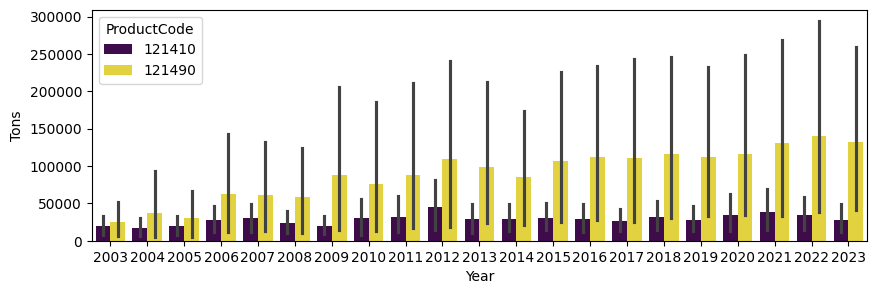

In [33]:
plt.figure(figsize=(10, 3))
sns.barplot(x='Year', y='tons',hue='ProductCode',data=df_exp,palette='viridis')
plt.xlabel('Year')
plt.ylabel('Tons')
plt.show()

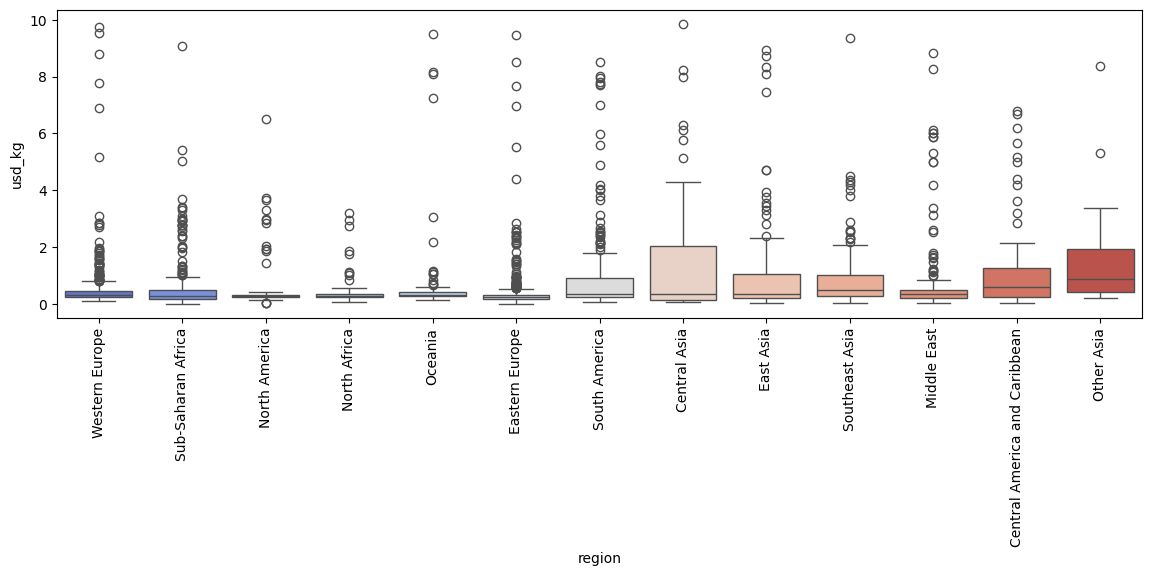

In [34]:
df_exp_100_1 = df_exp[df_exp['usd_kg']<10]
plt.figure(figsize=(14, 4))
sns.boxplot(x='region', y='usd_kg', data=df_exp_100_1, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

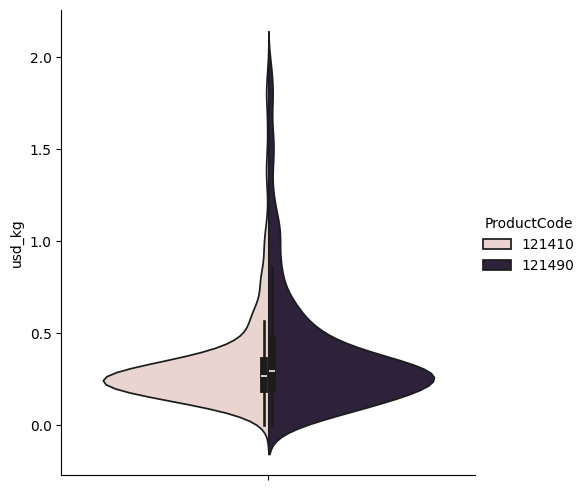

In [35]:
#TARIC AND TONS
df_exp_100 = df_exp[df_exp['usd_kg']<2]
sns.catplot(df_exp_100, hue='ProductCode', y = 'usd_kg', kind='violin', split=True);

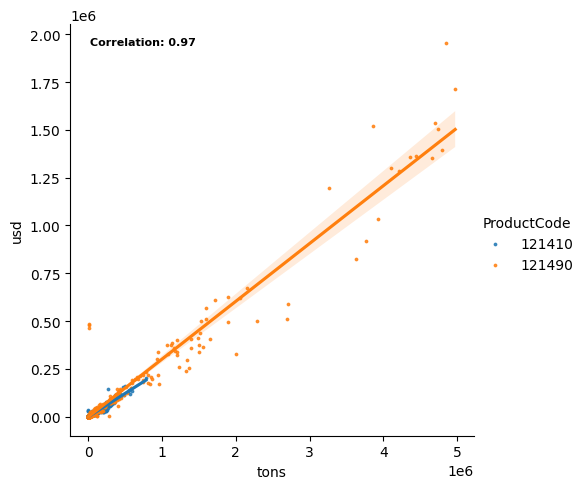

In [36]:
correlation = df_exp[['usd', 'tons']].corr().iloc[0, 1]
sns.lmplot(x="tons", y="usd", hue='ProductCode', scatter_kws={"s": 3}, data=df_exp)
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=8, color='black', fontweight='bold')
plt.show()

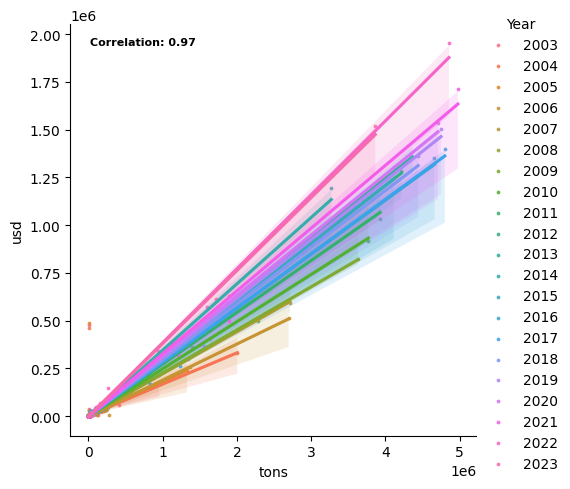

In [37]:
correlation = df_exp[['usd', 'tons']].corr().iloc[0, 1]
sns.lmplot(x="tons", y="usd", hue='Year', scatter_kws={"s": 3}, data=df_exp)
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=8, color='black', fontweight='bold')
plt.show()

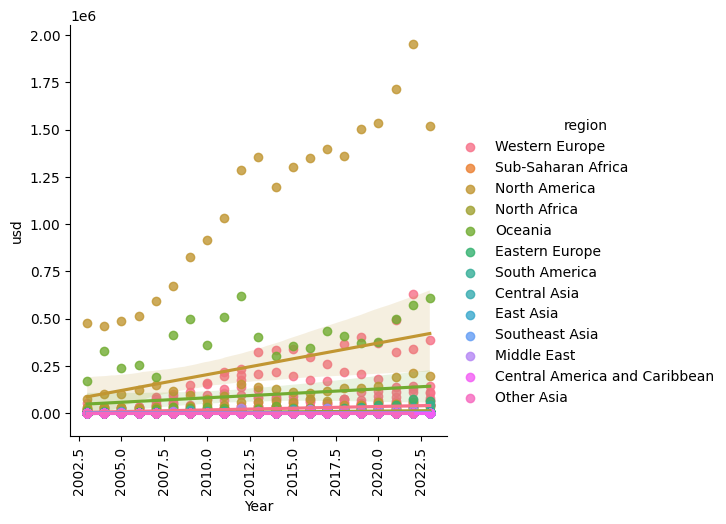

In [38]:
sns.lmplot(x="Year", y="usd", hue='region', data=df_exp)
plt.xticks(rotation=90)
plt.show()

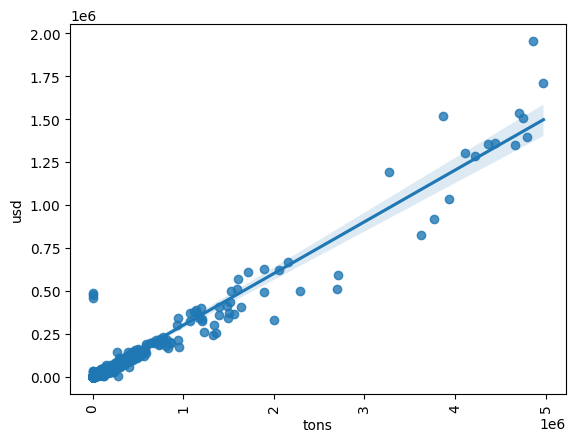

In [39]:
sns.regplot(x="tons", y="usd",data=df_exp)
plt.xticks(rotation=90)
plt.show()

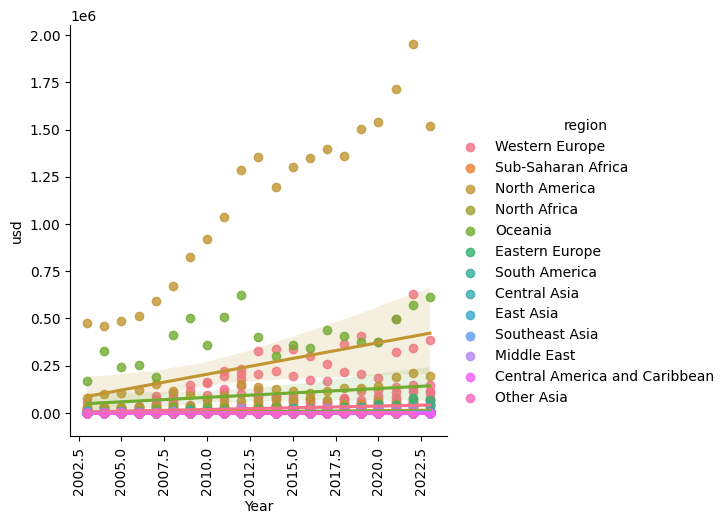

In [40]:
sns.lmplot(x="Year", y="usd", hue='region', data=df_exp)
plt.xticks(rotation=90)
plt.show()

##**5.2 EDA df_imp**

In [41]:
#format numbers in describe as float, not cientific
pd.options.display.float_format = '{:.2f}'.format
df_imp.describe()

,Year,ProductCode,usd,tons,usd_kg,tons_esp,tons_usa,tons_can,tons_ita,tons_aus,tons_oth,usd_esp,usd_usa,usd_can,usd_ita,usd_aus,usd_oth,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
count,4997.00,4997.00,4997.00,4997.00,4984.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,1109.00,1937.00,1420.00,736.00,933.00,4542.00
mean,2013.04,121453.99,9586.90,30452.65,2.40,2984.88,15087.53,2036.66,1327.95,3083.59,5932.04,841.81,5029.69,698.45,367.71,1043.67,1605.57,1.29,inf,inf,4.26,inf,NaN
std,5.91,39.80,63430.40,186560.12,34.10,24616.42,129778.91,17616.11,12227.67,30559.78,26139.06,7463.75,44908.54,5981.37,3442.67,10517.07,6384.23,7.00,NaN,NaN,30.90,NaN,NaN
min,2003.00,121410.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-12.29,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,-inf
25%,2008.00,121410.00,14.49,27.22,0.25,0.00,0.00,0.00,0.00,0.00,1.76,0.00,0.00,0.00,0.00,0.00,1.64,0.24,0.38,0.26,0.33,0.36,0.24
50%,2013.00,121490.00,148.95,352.76,0.37,0.00,0.00,0.00,0.00,0.00,104.23,0.00,0.00,0.00,0.00,0.00,45.80,0.31,0.67,0.34,0.47,0.48,0.36
75%,2018.00,121490.00,1330.01,3929.91,0.70,0.00,14.31,0.00,0.62,0.00,1521.94,0.00,15.36,0.00,1.00,0.00,499.36,0.42,2.42,0.92,0.66,0.75,0.68
max,2023.00,121490.00,1001457.10,2715090.00,2220.00,542554.00,2095000.00,342163.00,329320.00,538124.00,500901.31,177990.39,763300.30,113780.22,93643.32,220839.09,105207.61,130.00,inf,inf,499.35,inf,inf


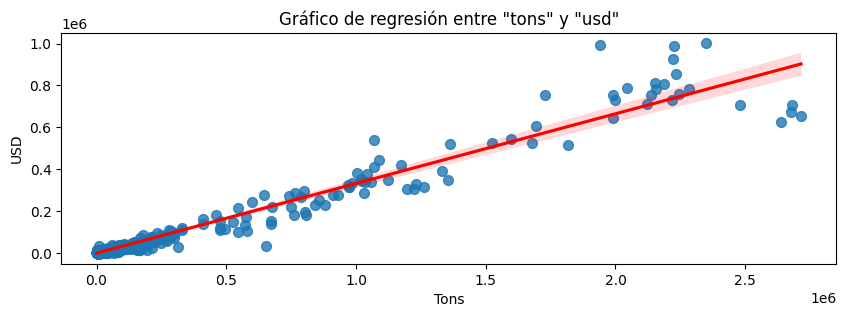

In [42]:
plt.figure(figsize=(10, 3))
sns.regplot(x='tons', y='usd', data=df_imp, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de regresión entre "tons" y "usd"')
plt.xlabel('Tons')
plt.ylabel('USD')
plt.show()

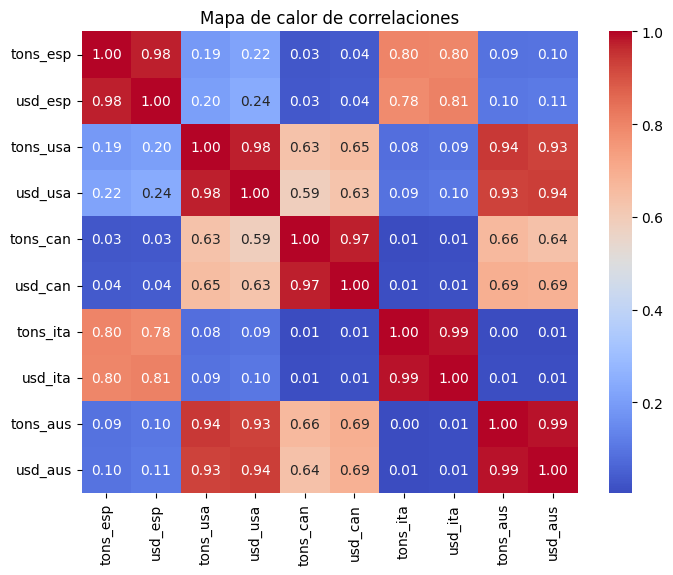

In [43]:
# Matriz de correlación
corr_matrix = df_imp[['tons_esp', 'usd_esp', 'tons_usa', 'usd_usa', 'tons_can', 'usd_can', 'tons_ita', 'usd_ita', 'tons_aus', 'usd_aus']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()

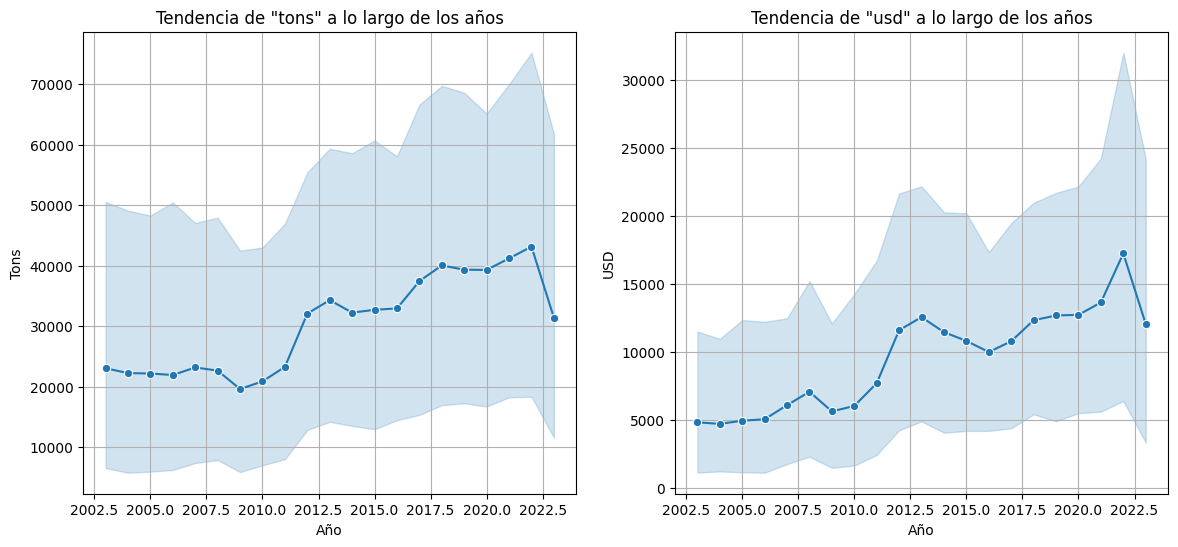

In [44]:
plt.figure(figsize=(14, 6))

# Primer subplot: Tendencia de 'tons' a lo largo de los años
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
sns.lineplot(x='Year', y='tons', data=df_imp, marker='o')
plt.title('Tendencia de "tons" a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Tons')
plt.grid(True)

# Segundo subplot: Tendencia de 'usd' a lo largo de los años
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
sns.lineplot(x='Year', y='usd', data=df_imp, marker='o')
plt.title('Tendencia de "usd" a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('USD')
plt.grid(True)

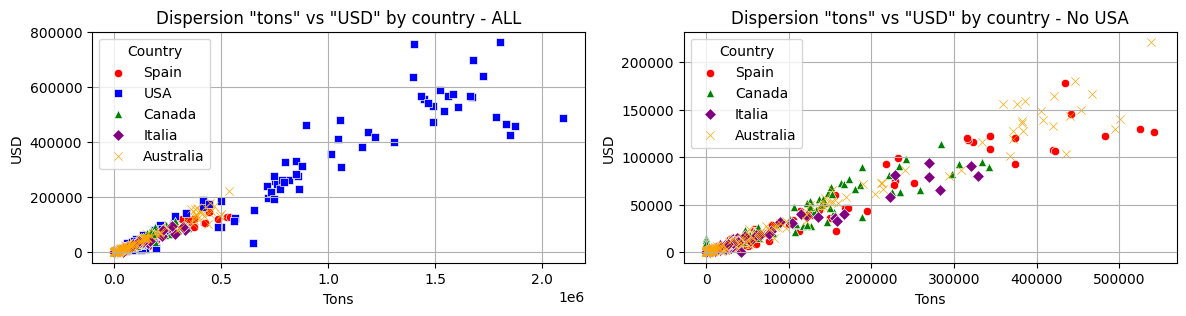

In [45]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tons_esp', y='usd_esp', label='Spain', data=df_imp, color='red', marker='o')
sns.scatterplot(x='tons_usa', y='usd_usa', label='USA', data=df_imp, color='blue', marker='s')
sns.scatterplot(x='tons_can', y='usd_can', label='Canada', data=df_imp, color='green', marker='^')
sns.scatterplot(x='tons_ita', y='usd_ita', label='Italia', data=df_imp, color='purple', marker='D')
sns.scatterplot(x='tons_aus', y='usd_aus', label='Australia', data=df_imp, color='orange', marker='x')
plt.title('Dispersion "tons" vs "USD" by country - ALL')
plt.xlabel('Tons')
plt.ylabel('USD')
plt.legend(title='Country')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x='tons_esp', y='usd_esp', label='Spain', data=df_imp, color='red', marker='o')
sns.scatterplot(x='tons_can', y='usd_can', label='Canada', data=df_imp, color='green', marker='^')
sns.scatterplot(x='tons_ita', y='usd_ita', label='Italia', data=df_imp, color='purple', marker='D')
sns.scatterplot(x='tons_aus', y='usd_aus', label='Australia', data=df_imp, color='orange', marker='x')
plt.title('Dispersion "tons" vs "USD" by country - No USA')
plt.xlabel('Tons')
plt.ylabel('USD')
plt.legend(title='Country')
plt.grid(True)


#**6. OUTLIERS**

In [46]:
df_imp['Year'] = df_imp['Year'].astype(str)
df_imp['ProductCode'] = df_imp['ProductCode'].astype(str)

##**6.0 DESCRIBE OUTLIERS - CHECK**

In [47]:
df_imp.describe()

,usd,tons,usd_kg,tons_esp,tons_usa,tons_can,tons_ita,tons_aus,tons_oth,usd_esp,usd_usa,usd_can,usd_ita,usd_aus,usd_oth,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
count,4997.00,4997.00,4984.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,4997.00,1109.00,1937.00,1420.00,736.00,933.00,4542.00
mean,9586.90,30452.65,2.40,2984.88,15087.53,2036.66,1327.95,3083.59,5932.04,841.81,5029.69,698.45,367.71,1043.67,1605.57,1.29,inf,inf,4.26,inf,NaN
std,63430.40,186560.12,34.10,24616.42,129778.91,17616.11,12227.67,30559.78,26139.06,7463.75,44908.54,5981.37,3442.67,10517.07,6384.23,7.00,NaN,NaN,30.90,NaN,NaN
min,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-12.29,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,-inf
25%,14.49,27.22,0.25,0.00,0.00,0.00,0.00,0.00,1.76,0.00,0.00,0.00,0.00,0.00,1.64,0.24,0.38,0.26,0.33,0.36,0.24
50%,148.95,352.76,0.37,0.00,0.00,0.00,0.00,0.00,104.23,0.00,0.00,0.00,0.00,0.00,45.80,0.31,0.67,0.34,0.47,0.48,0.36
75%,1330.01,3929.91,0.70,0.00,14.31,0.00,0.62,0.00,1521.94,0.00,15.36,0.00,1.00,0.00,499.36,0.42,2.42,0.92,0.66,0.75,0.68
max,1001457.10,2715090.00,2220.00,542554.00,2095000.00,342163.00,329320.00,538124.00,500901.31,177990.39,763300.30,113780.22,93643.32,220839.09,105207.61,130.00,inf,inf,499.35,inf,inf


In [48]:
#df_imp[['Reporter','Year','ProductCode','tons_can','usd_can','usd_kg_can']].sort_values('usd_kg_can',ascending=True).head(10)

##**6.1 NEGATIVE VALUES**

* **tons_oth & usd_oth**

There are 70 values in **tons_oth** and **usd_oth** that after doing the difference with the five main exporters have a **minimum negative values**, because of the decimals (from -0.00 to -0.08 tons or from -0.00 to -0.01 usd).

In [49]:
df_imp.loc[df_imp['tons_oth'] <= 0, 'tons_oth'] = 0
df_imp.loc[df_imp['usd_oth'] <= 0, 'usd_oth'] = 0

##**6.2 ALMOST 0.00x VALUES**

* **['usd'] & '['tons']**

In [50]:
df_imp = df_imp[(df_imp['tons']>=0.0049) & (df_imp['usd']>=0.0049)]

* **['usd_kg_other'] & ['tons_oth'] + ['usd_oth']**

In [51]:
df_imp.loc[(df_imp['tons_oth'] <= 0.0049) & (df_imp['usd_oth'] <= 0.0049), ['tons_oth','usd_oth']] = 0

In [52]:
df_imp.loc[(df_imp['tons_oth'] <= 0.0049) & (df_imp['usd_oth'] <= 0.014), 'usd_kg_oth'] = np.nan

##**6.3 INFINITE VALUES**

In the columns generated related to usd/kg, there are some infinite values in some small usd amounts. The reason is that there is no tons values for those. Therefore, for now it will be set as **np.nan**.

In [53]:
usd_kg_inf = ['usd_kg_esp', 'usd_kg_usa', 'usd_kg_ita', 'usd_kg_can','usd_kg_aus','usd_kg_oth','usd_kg']
df_imp[usd_kg_inf] = df_imp[usd_kg_inf].replace([np.inf, -np.inf], np.nan)

##**6.4 MIN-MAX VALUES**

<Axes: xlabel='usd_kg'>

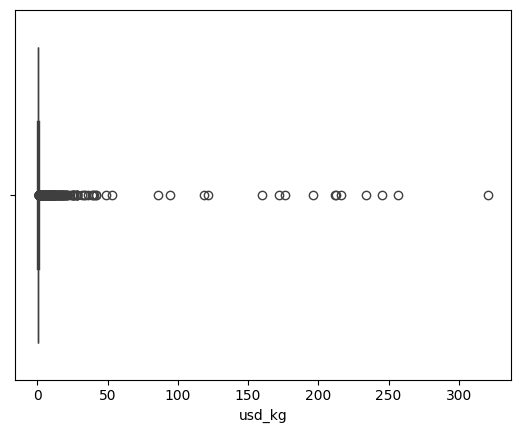

In [54]:
sns.boxplot(x='usd_kg', data = df_imp)

###**6.4.1 MAX 'USD_KG'**

* **USA**: It appears that during 2003 to 2005 there was a mistake in the kg, expressed directly in tones. To amend it, the tons in those years will be increased to *1000

In [55]:
df_imp.sort_values('usd_kg_oth')

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg,tons_esp,tons_usa,tons_can,tons_ita,tons_aus,tons_oth,usd_esp,usd_usa,usd_can,usd_ita,usd_aus,usd_oth,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
2289,Sri Lanka,Central Asia,2023,121490,"Other forage products, nes",575.34,1129.25,0.51,0.00,0.00,0.00,1129.25,0.00,0.00,0.00,0.02,0.00,575.27,0.00,0.05,NaN,20.00,0.51,NaN,0.00,-25.00
4944,Brazil,South America,2015,121490,"Other forage products, nes",37.22,0.31,121.63,12.60,0.00,0.00,0.00,0.00,0.00,16.79,0.00,0.00,0.00,0.00,20.43,1.33,NaN,NaN,NaN,NaN,-1.66
1636,Other Asia,Other Asia,2008,121410,Lucerne (alfalfa) meal and pellets,8243.99,54911.50,0.15,922.60,42167.40,11304.60,0.00,516.89,0.01,198.55,5602.45,2332.23,0.00,110.77,0.00,0.22,0.13,NaN,0.21,0.21,-1.00
1977,Cuba,Central America and Caribbean,2005,121410,Lucerne (alfalfa) meal and pellets,422.69,1139.50,0.37,959.65,0.00,179.84,0.00,0.00,0.01,338.98,0.00,83.71,0.00,0.00,0.00,0.35,NaN,NaN,0.47,NaN,0.00
1771,Lebanon,Middle East,2007,121410,Lucerne (alfalfa) meal and pellets,443.38,1633.93,0.27,0.00,0.04,0.00,1633.88,0.00,0.00,0.00,0.28,0.00,443.10,0.00,0.00,NaN,6.22,0.27,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,St. Lucia,Central America and Caribbean,2015,121490,"Other forage products, nes",3.50,8.33,0.42,0.00,8.33,0.00,0.00,0.00,0.00,0.00,3.50,0.00,0.00,0.00,0.00,NaN,0.42,NaN,NaN,NaN,NaN
4974,Mongolia,East Asia,2015,121490,"Other forage products, nes",3.32,4.55,0.73,0.00,4.55,0.00,0.00,0.00,0.00,0.00,3.32,0.00,0.00,0.00,0.00,NaN,0.73,NaN,NaN,NaN,NaN
4975,El Salvador,Central America and Caribbean,2015,121490,"Other forage products, nes",3.08,19.96,0.15,0.00,19.96,0.00,0.00,0.00,0.00,0.00,3.08,0.00,0.00,0.00,0.00,NaN,0.15,NaN,NaN,NaN,NaN
4976,Ethiopia,Sub-Saharan Africa,2015,121490,"Other forage products, nes",3.03,0.32,9.35,0.00,0.32,0.00,0.00,0.00,0.00,0.00,3.03,0.00,0.00,0.00,0.00,NaN,9.35,NaN,NaN,NaN,NaN


In [56]:
tons_amend = ['tons','tons_esp','tons_usa','tons_can','tons_ita','tons_aus','tons_oth',]
df_imp.loc[(df_imp['Reporter']=='United States') & (df_imp['Year'].between('2003','2005')),tons_amend] = df_imp[tons_amend]*1000

kg_usd_amend = ['usd_kg','usd_kg_esp','usd_kg_usa','usd_kg_ita','usd_kg_can','usd_kg_aus','usd_kg_oth']
df_imp.loc[(df_imp['Reporter']=='United States') & (df_imp['Year'].between('2003','2005')),kg_usd_amend] = df_imp[kg_usd_amend]/1000

In [57]:
#df_imp[(df_imp['Reporter']=='United States') & (df_imp['Year'].between('2003','2005'))]

* **USD_KG: OVER 2000**

In [58]:
df_imp.loc[(df_imp['Reporter']=='Nicaragua') & (df_imp['usd_kg']>500),['usd_kg','usd_kg_oth']] = np.nan

* **USD_KG: OTHER OUTLIER VALUES**

In [59]:
df_imp.loc[(df_imp['usd_kg']>100),tons_amend] = df_imp[tons_amend]*1000
df_imp.loc[(df_imp['usd_kg']>100),kg_usd_amend] = df_imp[kg_usd_amend]/1000

In [60]:
df_imp.loc[(df_imp['usd_kg']>30),tons_amend] = df_imp[tons_amend]*100
df_imp.loc[(df_imp['usd_kg']>30),kg_usd_amend] = df_imp[kg_usd_amend]/100

In [61]:
country_10_list = ['Papua New Guinea','Kenya','Anguila','Belize','Uganda','Ethiopia','Zimbabwe','Rwanda','Tunisia','Costa Rica','Mali']

mask = df_imp['Reporter'].isin(country_10_list)

df_imp.loc[(df_imp['usd_kg'] >= 10) & mask, tons_amend] = df_imp.loc[(df_imp['usd_kg'] >= 10) & mask, tons_amend] * 100
df_imp.loc[(df_imp['usd_kg'] >= 10) & mask, kg_usd_amend] = df_imp.loc[(df_imp['usd_kg'] >= 10) & mask, kg_usd_amend] / 100

df_imp.loc[(df_imp['usd_kg'] >= 10) & ~mask, tons_amend] = df_imp.loc[(df_imp['usd_kg'] >= 10) & ~mask, tons_amend] * 10
df_imp.loc[(df_imp['usd_kg'] >= 10) & ~mask, kg_usd_amend] = df_imp.loc[(df_imp['usd_kg'] >= 10) & ~mask, kg_usd_amend] / 10

In [62]:
#SOUTH AFRICA
df_imp.loc[(df_imp['Reporter']=='South Africa') & (df_imp['usd_kg'] >= 1),tons_amend] = df_imp[tons_amend]*10
df_imp.loc[(df_imp['Reporter']=='South Africa') & (df_imp['usd_kg'] >= 1),kg_usd_amend] = df_imp[kg_usd_amend]/10

In [63]:
country_7_list = ['Iran', 'Trinidad and Tobago', 'Belize', 'India', 'St. Lucia', 'Nicaragua',
                  'China', 'Zimbabwe', 'Seychelles', 'Ghana', 'Australia', 'Ethiopia', 'Zambia',
                  'Jamaica', 'Ecuador', 'St. Vincent and the Grenadines', 'Gabon']

mask_country_7 = df_imp['Reporter'].isin(country_7_list)

df_imp.loc[(df_imp['usd_kg'] >= 7) & mask_country_7, tons_amend] = df_imp.loc[(df_imp['usd_kg'] >= 7) & mask_country_7, tons_amend] * 10
df_imp.loc[(df_imp['usd_kg'] >= 7) & mask_country_7, kg_usd_amend] = df_imp.loc[(df_imp['usd_kg'] >= 7) & mask_country_7, kg_usd_amend] / 10

In [64]:
country_4_7_list =['Ghana','Australia','El Salvador','Latvia','Nicaragua','Bermuda','Kenya','New Zealand','Zimbabwe',
'Guinea','Niger','Estonia','Slovakia','Sudan','Mozambique','Pakistan','Lithuania','Zambia','St. Lucia',
'Papua New Guinea','Fiji','Mexico','Burundi','Madagascar','Uruguay','Palau','Belize','Honduras','India',
'Ethiopia','Comoros','Cyprus','French Polynesia','Georgia','Cambodia','Jamaica','Bolivia','Algeria',
'Benin','Brunei','Ireland','Malawi','Cameroon','Guatemala','Dominican Republic','Trinidad and Tobago',
'Gambia',"Cote d'Ivoire"]

mask_country_4_7 = df_imp['Reporter'].isin(country_4_7_list)

df_imp.loc[(df_imp['usd_kg'].between(4,7)) & mask_country_4_7, tons_amend] = df_imp.loc[(df_imp['usd_kg'].between(4,7)) & mask_country_4_7, tons_amend] * 10
df_imp.loc[(df_imp['usd_kg'].between(4,7)) & mask_country_4_7, kg_usd_amend] = df_imp.loc[(df_imp['usd_kg'].between(4,7)) & mask_country_4_7, kg_usd_amend] / 10

In [65]:
df_imp[(df_imp['usd_kg'] > 4)&(df_imp['usd_kg'] < 7)]['Reporter'].unique()

array(['Antigua and Barbuda', 'Sao Tome and Principe', 'Bahamas',
       'Wallis and Futura Isl.', 'Chile', 'Maldives', 'Togo', 'Panama',
       'Angola', 'Vanuatu', 'Kazakhstan'], dtype=object)

In [66]:
#0: 'Mongolia', 'Chile','Maldives','Vanuatu','Antigua and Barbuda','Sao Tome and Principe','Bahamas','Tonga','Vanuatu'

In [67]:
#CASE TO STUDY: 'Chile','Maldives','Togo','Panama',

* **FINAL SPECIAL CASES**

In [68]:
#GUATEMALA
df_imp.loc[(df_imp['Reporter']=='Guatemala') & (df_imp['usd_kg'] >= 3),tons_amend] = df_imp[tons_amend]*10
df_imp.loc[(df_imp['Reporter']=='Guatemala') & (df_imp['usd_kg'] >= 3),kg_usd_amend] = df_imp[kg_usd_amend]/10

In [69]:
# & (df_imp['ProductCode']=='121490')
#df_imp[(df_imp['Reporter']=='Chile')]

###**6.4.2 MIN 'USD_KG'**

In [70]:
df_imp[df_imp['usd_kg']<0.02]['Reporter'].unique()

array(['Slovenia', 'Kazakhstan', 'Malawi', 'Bermuda', 'Croatia'],
      dtype=object)

In [71]:
min_values = ['Indonesia','Slovenia','Latvia','Eswatini','Nicaragua','Qatar','China','Kazakhstan','Guatemala','Zambia','Kyrgyzstan',
 'Jamaica','Madagascar','Dominica','Bermuda','Burkina Faso','Congo, Dem. Rep.','Malawi','Uruguay','Rwanda','Croatia',
 'Tanzania','Pakistan','El Salvador','Senegal','Ethiopia','Samoa','Russia']

mask_min_values = df_imp['Reporter'].isin(min_values)

df_imp.loc[(df_imp['usd_kg'] <0.044) & mask_min_values, tons_amend] = df_imp.loc[(df_imp['usd_kg'] <0.044) & mask_min_values, tons_amend] / 10
df_imp.loc[(df_imp['usd_kg'] <0.044) & mask_min_values, kg_usd_amend] = df_imp.loc[(df_imp['usd_kg'] <0.044) & mask_min_values, kg_usd_amend] * 10

##**6.5 USD_KG_COUNTRY CORRECTION**

In [72]:
df_imp.head(1)

,Reporter,region,Year,ProductCode,Product Description,usd,tons,usd_kg,tons_esp,tons_usa,tons_can,tons_ita,tons_aus,tons_oth,usd_esp,usd_usa,usd_can,usd_ita,usd_aus,usd_oth,usd_kg_esp,usd_kg_usa,usd_kg_ita,usd_kg_can,usd_kg_aus,usd_kg_oth
0,United States,North America,2023,121410,Lucerne (alfalfa) meal and pellets,37171.18,86706.00,0.43,0.00,0.00,62422.00,0.00,819.00,23465.00,0.00,0.00,26919.38,0.00,162.70,10089.10,NaN,NaN,NaN,0.43,0.20,0.43


In [73]:
#MAX VALUES
df_imp.loc[((df_imp['tons_esp']<3) & (df_imp['usd_esp']<3) & (df_imp['usd_kg_esp']>15))|(df_imp['usd_kg_esp']<0.004),'usd_kg_esp'] =np.nan
df_imp.loc[((df_imp['tons_usa']<3) & (df_imp['usd_usa']<3) & (df_imp['usd_kg_usa']>15))|(df_imp['usd_kg_usa']<0.004),'usd_kg_usa'] =np.nan
df_imp.loc[((df_imp['tons_can']<3) & (df_imp['usd_can']<3) & (df_imp['usd_kg_can']>15))|(df_imp['usd_kg_can']<0.004),'usd_kg_can'] =np.nan
df_imp.loc[((df_imp['tons_aus']<3) & (df_imp['usd_aus']<3) & (df_imp['usd_kg_aus']>15))|(df_imp['usd_kg_aus']<0.004),'usd_kg_aus'] =np.nan
df_imp.loc[((df_imp['tons_ita']<3) & (df_imp['usd_ita']<3) & (df_imp['usd_kg_ita']>15))|(df_imp['usd_kg_ita']<0.004),'usd_kg_ita'] =np.nan
df_imp.loc[((df_imp['tons_oth']<3) & (df_imp['usd_oth']<3) & (df_imp['usd_kg_oth']>15))|(df_imp['usd_kg_oth']<0.004),'usd_kg_oth'] =np.nan

df_imp.loc[(df_imp['usd_kg_esp']>20),'usd_kg_esp'] =np.nan
df_imp.loc[(df_imp['usd_kg_usa']>20),'usd_kg_usa'] =np.nan
df_imp.loc[(df_imp['usd_kg_can']>20),'usd_kg_can'] =np.nan
df_imp.loc[(df_imp['usd_kg_aus']>20),'usd_kg_aus'] =np.nan
df_imp.loc[(df_imp['usd_kg_ita']>20),'usd_kg_ita'] =np.nan
df_imp.loc[(df_imp['usd_kg_oth']>20),'usd_kg_oth'] =np.nan

##**6.6 DF_EXP**

###**6.6.1 DF_EXP - MAX**

<Axes: xlabel='usd_kg'>

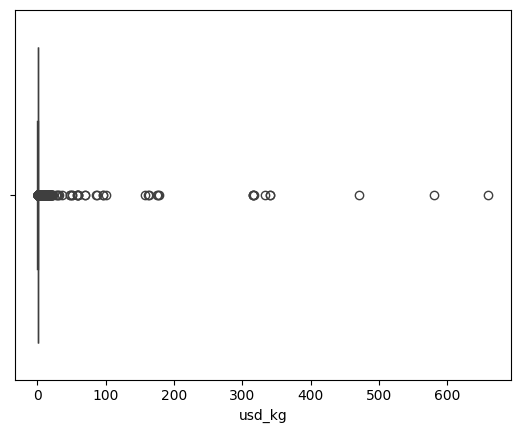

In [74]:
sns.boxplot(x='usd_kg', data = df_exp)

In [75]:
df_exp.describe()

,Year,ProductCode,usd,tons,usd_kg
count,2970.00,2970.00,2970.00,2970.00,2952.00
mean,2012.99,121458.65,19083.09,66117.50,3.00
std,5.97,39.06,110711.76,358397.64,25.90
min,2003.00,121410.00,0.00,0.00,0.00
25%,2008.00,121410.00,12.33,32.70,0.20
50%,2013.00,121490.00,192.32,654.27,0.30
75%,2018.00,121490.00,2181.04,7369.15,0.52
max,2023.00,121490.00,1954668.23,4976550.00,660.00


In [76]:
country_exp_list = ['United States','Lesotho','South Korea','Jordan','India','Zimbabwe']

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list)) &
           (df_exp['usd_kg']>100),'tons'] *=1000

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list)) &
           (df_exp['usd_kg']>100),'usd_kg'] /=1000

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list)) &
           (df_exp['usd_kg']>20),'tons'] *=100

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list)) &
           (df_exp['usd_kg']>20),'usd_kg'] /=100

In [77]:
country_exp_list2 = ['Papua New Guinea','Singapore','Nepal','Morocco','Japan','Peru','Ireland','Kenya','St. Lucia','Bahrain','Mozambique','Angola','Zimbabwe']

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list2)) &
           (df_exp['usd_kg']>=20),'tons'] *=100

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list2)) &
           (df_exp['usd_kg']>=20),'usd_kg'] /=100

In [78]:
country_exp_list3 = ['Bolivia','Fiji','Jamaica','Brazil']

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list3)) &
           (df_exp['usd_kg']>=20),'tons'] *=10

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list3)) &
           (df_exp['usd_kg']>=20),'usd_kg'] /=10

In [79]:
country_exp_list4 = ['Philippines','Switzerland','Dominican Republic','Peru','New Zealand','Slovenia','Guinea','Qatar','Suriname','Bahrain','Malta','Botswana','India','Uganda',
                     'Poland','Japan','Lesotho','Finland','Morocco','Saudi Arabia','Barbados','South Korea','Brazil','Guatemala']

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list4)) &
           (df_exp['usd_kg']>=10),'tons'] *=10

df_exp.loc[(df_exp['Reporter'].isin(country_exp_list4)) &
           (df_exp['usd_kg']>=10),'usd_kg'] /=10

In [80]:
df_exp.loc[(df_exp['tons']<0.1) &
           (df_exp['usd_kg']>=10),'tons'] *=10
df_exp.loc[(df_exp['tons']<0.1) &
           (df_exp['usd_kg']>=10),'usd_kg'] /=10

In [81]:
#df_exp[(df_exp['Reporter']=='China')].sort_values('Year')

###**6.6.2 DF_EXP - MIN**

In [82]:
df_exp.loc[(df_exp['usd_kg']<=0.019),'tons'] /=10
df_exp.loc[(df_exp['usd_kg']<=0.019),'usd_kg'] *=10

In [83]:
#df_exp[df_exp['usd_kg']<0.05].sort_values('usd_kg',ascending=True)

#**7. PICKLE**

In [84]:
df_exp.to_csv('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/db_alfalfa_export.csv', index=False)
df_imp.to_csv('/content/drive/MyDrive/DA_PROJECTS/003_ALFALFA_2003-2023/databases/db_alfalfa_import.csv', index=False)